In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,f1_score

In [3]:
df = pd.read_csv('dados_produtos.csv')

In [5]:
df.head

<bound method NDFrame.head of    product_name  rating  rating_count  purchased
0     Televisão    3.04            29          1
1       Celular    3.46          3872          0
2     Cafeteira    3.25          1187          0
3     Televisão    3.77          4097          1
4     Videogame    5.00          4738          1
..          ...     ...           ...        ...
95         iPod    4.44          1372          0
96      Celular    4.66          1690          1
97    Televisão    4.33          3364          1
98     Notebook    3.30          1825          1
99         iPod    4.08           533          0

[100 rows x 4 columns]>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  100 non-null    object 
 1   rating        100 non-null    float64
 2   rating_count  100 non-null    int64  
 3   purchased     100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB


In [9]:
df.describe()

,rating,rating_count,purchased
count,100.000000,100.000000,100.00
mean,4.056900,2536.670000,0.55
std,0.588344,1458.312544,0.50
min,3.020000,10.000000,0.00
25%,3.580000,1433.250000,0.00
50%,4.105000,2424.000000,1.00
75%,4.505000,3773.000000,1.00
max,5.000000,4977.000000,1.00


<Axes: xlabel='product_name', ylabel='rating'>

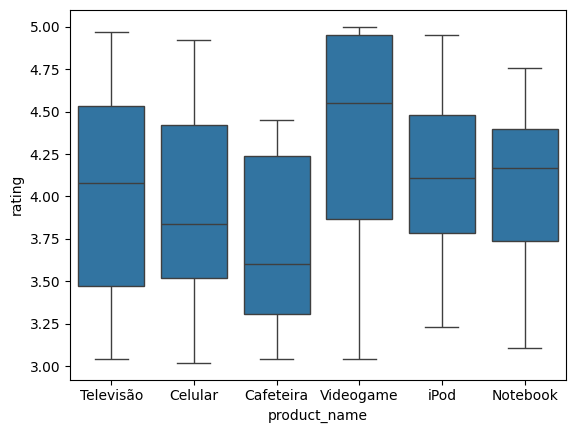

In [12]:
sns.boxplot(x = df['product_name'],y=df['rating'])

In [16]:
df.isnull().sum()#Verifica se existe valores vazios na base de dados

product_name    0
rating          0
rating_count    0
purchased       0
dtype: int64

In [18]:
df.isna().sum()

product_name    0
rating          0
rating_count    0
purchased       0
dtype: int64

In [20]:
#calculando a correlação
col_n = df.select_dtypes(include=['number'])#seleciona somente as colunas numericas 

In [23]:
# correlação
correlacao = col_n.corr()
correlacao

,rating,rating_count,purchased
rating,1.000000,0.051993,0.032637
rating_count,0.051993,1.000000,0.129694
purchased,0.032637,0.129694,1.000000


<Axes: >

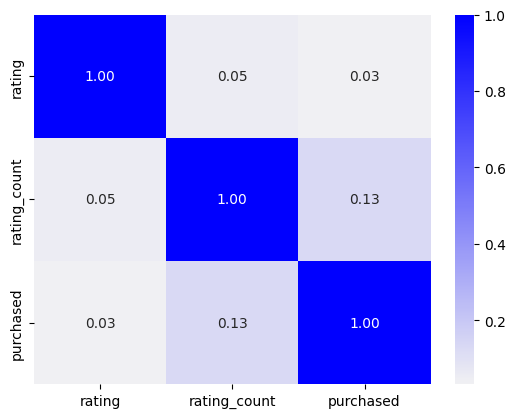

In [29]:
#plotando o grafico da correlação
color = sns.color_palette('light:blue',as_cmap= True)
sns.heatmap(correlacao,cmap=color,fmt='.2f',annot= True)

In [33]:
products = df['product_name'].unique()

for product in products:

    print(f'\n--------------------------- Árvore de Decisão do Produto {product} ---------------------------------\n')
    
    product_df = df.loc[df['product_name'] == product]

    X = product_df.drop(['purchased', 'product_name'], axis=1)
    y = product_df['purchased']

    X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    dtc = DecisionTreeClassifier()
    model = dtc.fit(X_train, y_train)
    y_pred = dtc.predict(x_test)

    print('Avaliação do Modelo: \n')
    print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
    print(f'F1 Score: {f1_score(y_test, y_pred)}')
    print(f'Precision Score: {precision_score(y_test, y_pred)}')
    print(f'Recall Score: {recall_score(y_test, y_pred)}')
    print(f'Confusion Matrix: {confusion_matrix(y_pred, y_test)}')
     
                         
           
    print('\nVisualização da Árvore:')

    product_df['purchased'] = product_df['purchased'].replace([1, 0], ['Comprou', 'Não Comprou'])
    
    fig = plt.figure(figsize=(10, 8))
    
    tree.plot_tree(model, feature_names=product_df['rating'].tolist(), class_names=product_df['purchased'].tolist(), filled= True)
    plt.title(f'Arvore decisão - {product}')
    plt.title(f'Matriz de confusão para o algoritmo Árvore de Decisão {product}') 


--------------------------- Árvore de Decisão do Produto Televisão ---------------------------------

Avaliação do Modelo: 

Accuracy Score: 0.5
F1 Score: 0.5
Precision Score: 1.0
Recall Score: 0.3333333333333333
Confusion Matrix: [[1 2]
 [0 1]]

Visualização da Árvore:


C:\Users\thale\AppData\Local\Temp\ipykernel_11364\2443982340.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['purchased'] = product_df['purchased'].replace([1, 0], ['Comprou', 'Não Comprou'])


NameError: name 'tree' is not defined

<Figure size 1000x800 with 0 Axes>